### Regression on actual data from kaggle

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [332]:
df = pd.read_csv("Housing.csv")

In [333]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [334]:
df.shape

(545, 13)

In [335]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [336]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [337]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

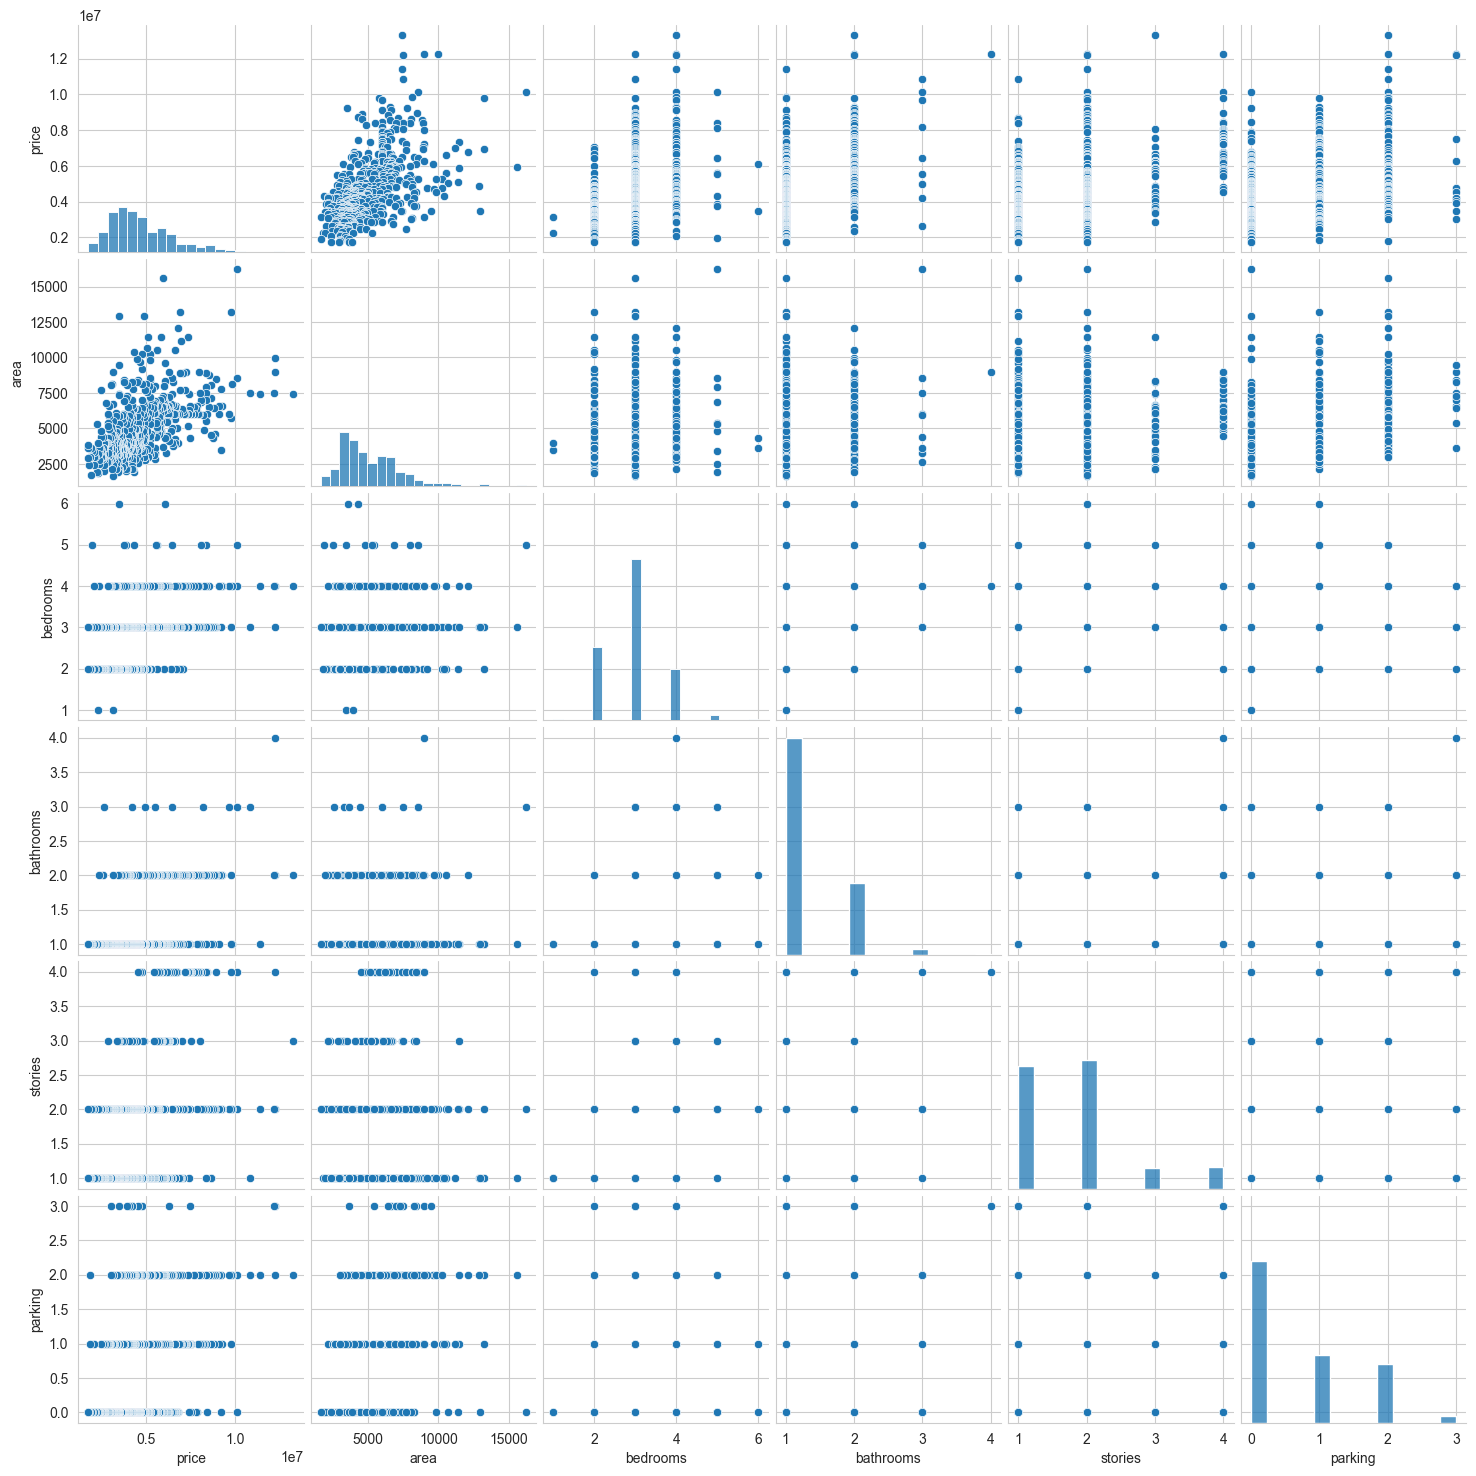

In [338]:
sns.set_style("whitegrid")
sns.pairplot(df)
plt.show()

In [339]:
df['mainroad'] = df['mainroad'].replace({'yes':1,'no':0}).astype(int)
df['guestroom'] = df['guestroom'].replace({'yes':1,'no':0}).astype(int)
df['basement'] = df['basement'].replace({'yes':1,'no':0}).astype(int)
df['hotwaterheating'] = df['hotwaterheating'].replace({'yes':1,'no':0}).astype(int)
df['airconditioning'] = df['airconditioning'].replace({'yes':1,'no':0}).astype(int)
df['prefarea'] = df['prefarea'].replace({'yes':1,'no':0}).astype(int)

C:\Users\saura\AppData\Local\Temp\ipykernel_3516\1322794184.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['mainroad'] = df['mainroad'].replace({'yes':1,'no':0}).astype(int)
C:\Users\saura\AppData\Local\Temp\ipykernel_3516\1322794184.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['guestroom'] = df['guestroom'].replace({'yes':1,'no':0}).astype(int)
C:\Users\saura\AppData\Local\Temp\ipykernel_3516\1322794184.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 

In [340]:
# df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished':2,'semi-furnished':1, 'unfurnished':0 }).astype(int)
df = df.join(pd.get_dummies(df.furnishingstatus).replace({'yes':1,'no':0})).drop(['furnishingstatus'], axis=1)

In [341]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [342]:
df_ap = df[['price','area']]
df_ap

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


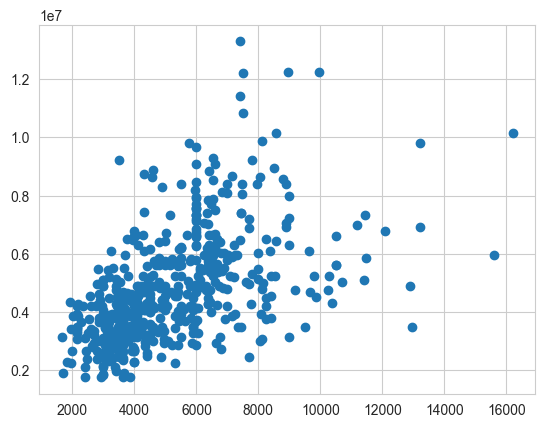

In [343]:
plt.scatter(df_ap['area'], df_ap['price'])

In [344]:
df_ap.corr()

,price,area
price,1.000000,0.535997
area,0.535997,1.000000


In [345]:
df_ap['area']

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

In [346]:
df_ap['price']

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [347]:
area = np.array(df_ap['area']).reshape(-1,1)
price = np.array(df_ap['price']).reshape(-1,1)

In [348]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [349]:
X_train, X_test, y_train, y_test = train_test_split(area, price, test_size=0.2, random_state=42)

In [350]:
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [351]:
y_pred = lm.predict(X_test)

In [352]:
print(X_test.shape)
print(y_pred.shape)

(109, 1)
(109, 1)


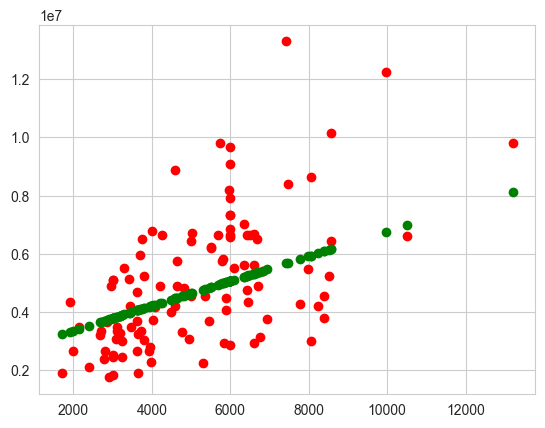

In [353]:
plt.scatter(X_test,y_test, color='r')
plt.scatter(X_test, y_pred, color='g')

In [354]:
lm.score(X_test,y_test)

0.27287851871974644

In [355]:
lm.coef_

array([[425.72984194]])

In [356]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
r2score = r2_score(y_true=y_test, y_pred=y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r2_score",r2score)


MAE: 1474748.1337969352
MSE: 3675286604768.185
RMSE: 1917103.7021424233
r2_score 0.27287851871974644


C:\Users\saura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: >

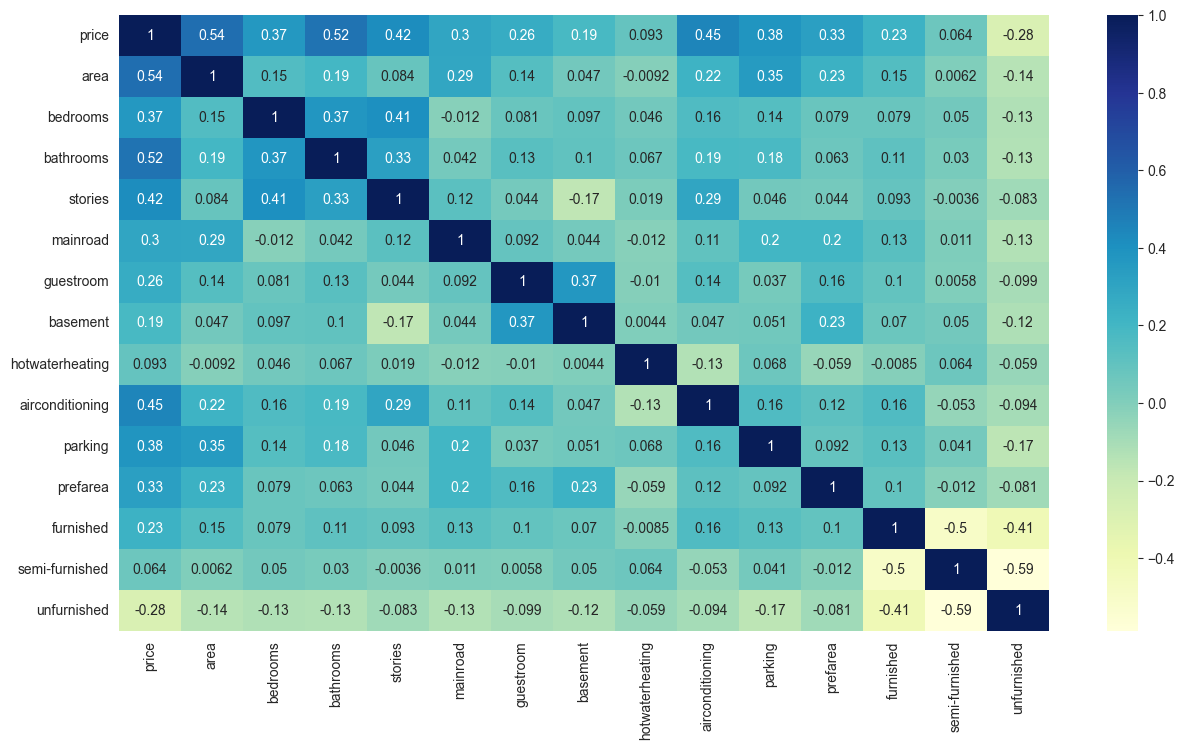

In [357]:
# df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [358]:
x = df.drop(['price'], axis = 1)
y = df['price']

In [359]:
# size = np.array(df['area']).reshaxpe(-1,1)

In [360]:
# from sklearn.discriminant_analysis import StandardScaler

# scalar = StandardScaler()
# x_scale = scalar.fit_transform(x)

In [361]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2 , random_state=42)

In [362]:
x_test.shape

(109, 14)

In [363]:
y_pred.shape

(109, 1)

In [364]:
lm_one = LinearRegression()
lm_one.fit(x_train, y_train)

LinearRegression()

In [365]:
y_pred = lm_one.predict(x_test)

In [366]:
lm_one.score(x_test,y_test)

0.6529242642153185

In [367]:
lm_one.coef_

array([ 2.35968805e+02,  7.67787016e+04,  1.09444479e+06,  4.07476595e+05,
        3.67919948e+05,  2.31610037e+05,  3.90251176e+05,  6.84649885e+05,
        7.91426736e+05,  2.24841913e+05,  6.29890565e+05,  1.80175627e+05,
        5.32938090e+04, -2.33469436e+05])

In [368]:
y_pred.__len__()

109

In [369]:
y_test.__len__()

109

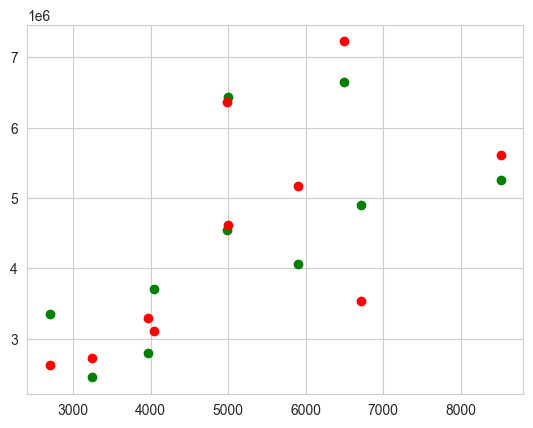

In [370]:
plt.scatter(X_test[0:10],y_test[0:10], color='g')
# plt.plot(X_test, y_pred, color='g')
plt.scatter(X_test[0:10],y_pred[0:10], color='r')

In [371]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
r2score = r2_score(y_true=y_test, y_pred=y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r2_score",r2score)

MAE: 970043.403920164
MSE: 1754318687330.6633
RMSE: 1324506.9600914384
r2_score 0.6529242642153185


C:\Users\saura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [376]:
df1 = pd.DataFrame(x_test, columns=["area"])

In [377]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 109 entries, 316 to 155
Series name: price
Non-Null Count  Dtype
--------------  -----
109 non-null    int64
dtypes: int64(1)
memory usage: 5.8 KB


In [378]:
df1['y_test'] = y_test
df1['y_pred'] = y_pred

In [391]:
# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    pd.set_option('float_format', '{:f}'.format)
    print(df1)

      area    y_test         y_pred
316   5900   4060000 5164653.900340
77    6500   6650000 7224722.298022
360   4040   3710000 3109863.242403
90    5000   6440000 4612075.327226
493   3960   2800000 3294646.257260
209   6720   4900000 3532275.095566
176   8520   5250000 5611774.568365
249   4990   4543000 6368145.987327
516   3240   2450000 2722856.956900
426   2700   3353000 2629405.615858
6     8580  10150000 9617039.503156
497   3934   2660000 2798087.304479
422   3720   3360000 3171096.768471
424   3100   3360000 3394639.091255
529   3970   2275000 3681088.654243
499   3630   2660000 5263187.746215
498   2000   2660000 3035963.476124
55    6000   7350000 4786122.800400
476   5850   2940000 4349551.920057
486   6000   2870000 3572362.099305
72    5020   6720000 5774875.213956
163   6825   5425000 5886993.579199
538   3649   1890000 2730836.195185
174   3800   5250000 4727316.473236
304   8250   4193000 5244847.527168
2     9960  12250000 7555324.216056
463   3090   3080000 3220790